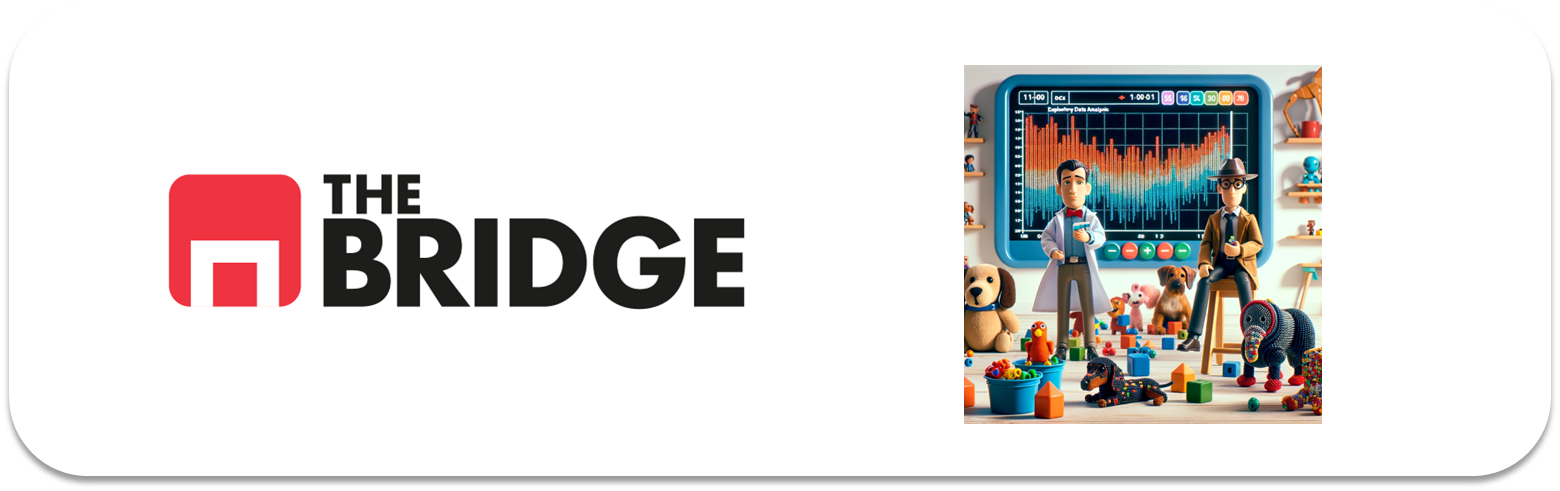

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [8]:
df_titanic = pd.read_csv('./data/titanic.csv')

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [13]:
df_titanic.drop(columns = ['deck', 'survived', 'pclass', 'embarked'], inplace = True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [16]:
df_titanic['family_members'] = df_titanic.parch + df_titanic.sibsp

In [18]:
df_titanic.drop(columns = ['parch', 'sibsp'], inplace = True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [35]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace = True)

In [36]:
df_titanic.embark_town.value_counts(dropna = False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [48]:
# hago la mediana porque directamente me da una edad real

In [47]:
df_titanic.age.fillna(df_titanic.age.median(), inplace = True)

In [49]:
df_titanic.age.value_counts(dropna = False)

age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

**1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?**

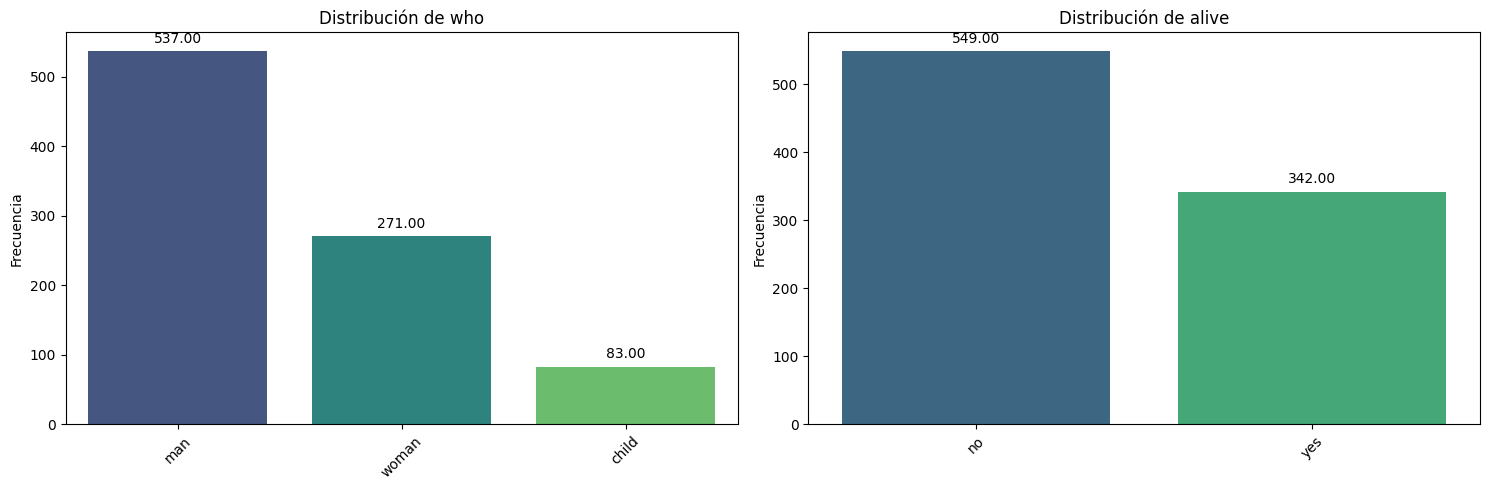

In [62]:
# ABOSLUTA
pinta_distribucion_categoricas(df_titanic, ['who', 'alive'], mostrar_valores=True)

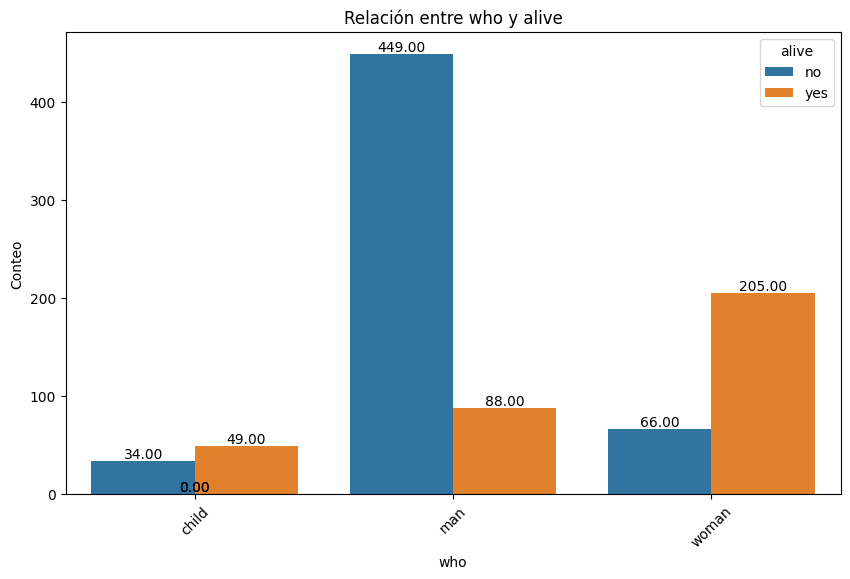

In [71]:
#Comparacion
plot_categorical_relationship_fin(df_titanic,'who', 'alive', show_values= True)

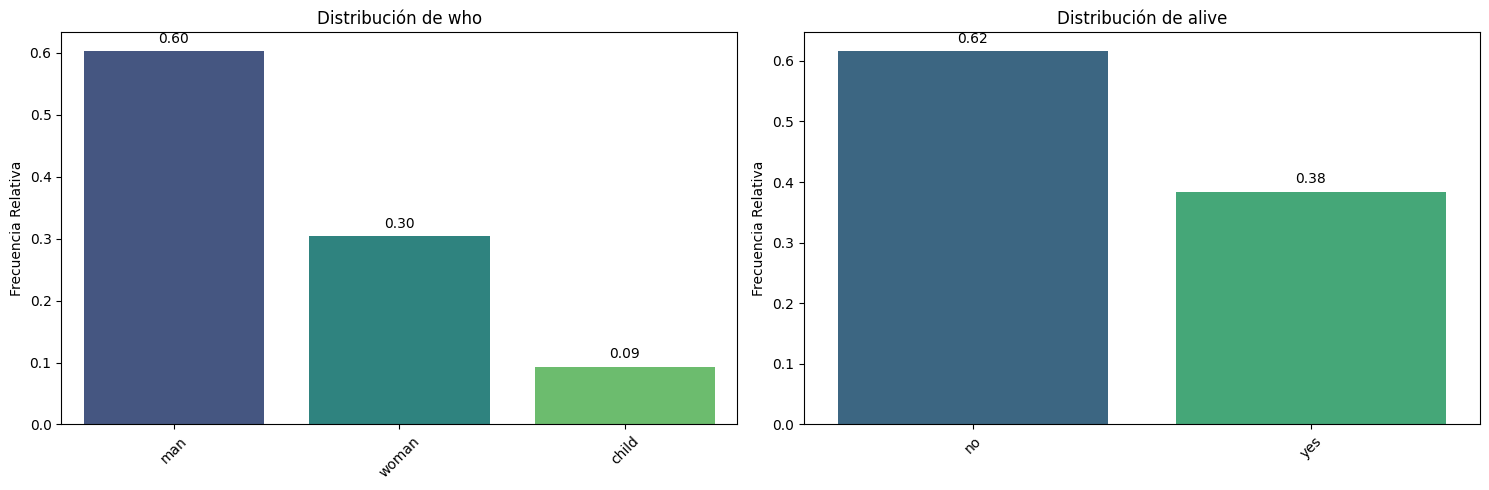

In [63]:
#RELATIVA
pinta_distribucion_categoricas(df_titanic, ['who', 'alive'], relativa = True, mostrar_valores=True)

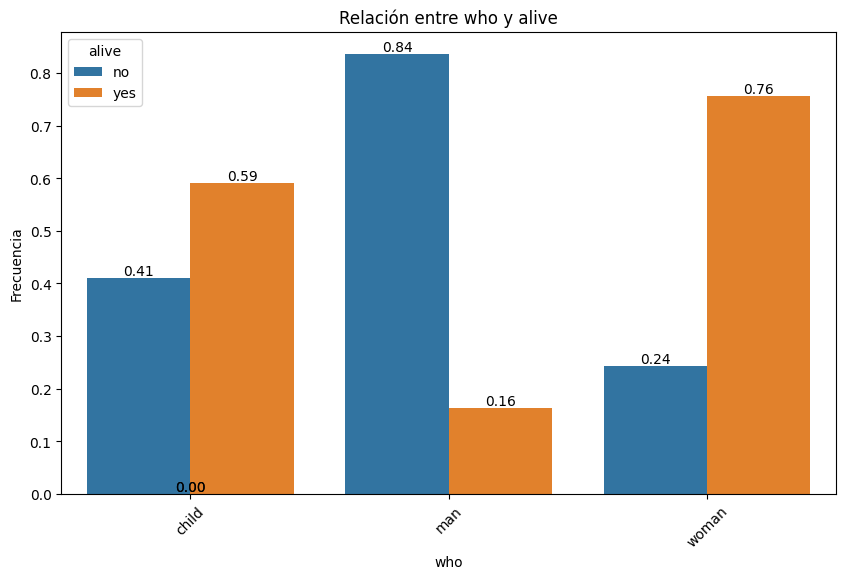

In [72]:
#Comparación
plot_categorical_relationship_fin(df_titanic,'who', 'alive', relative_freq = True, show_values= True)

In [66]:
#lo mismo pero en numeros
df_titanic.groupby('alive', as_index=False)['who'].value_counts(normalize=True)

,alive,who,proportion
0,no,man,0.817851
1,no,woman,0.120219
2,no,child,0.061931
3,yes,woman,0.599415
4,yes,man,0.257310
5,yes,child,0.143275


In [79]:
#TEST DE CHI-CUADRADO
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])
tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [80]:

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


### ANALISIS 1
+ Absoluta:\
  Podemos ver que la mayoría de sobrevivientes fueron mujeres, luego hombres y finalmente niños
+ Relativa:\
  En la relativa vemos como los que sobrevivieron fueron principalmente mujeres y niños y luego con un porcentaje muy pequeño de hombres. Indica que había un preferencia de mujeres y niños ante hombres
+ Chi-Cuadrado:\
  Este test nos confirma que la relación estadística entre las mujeres, niños y luego hombres, no ha sido casualidad

**2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?**

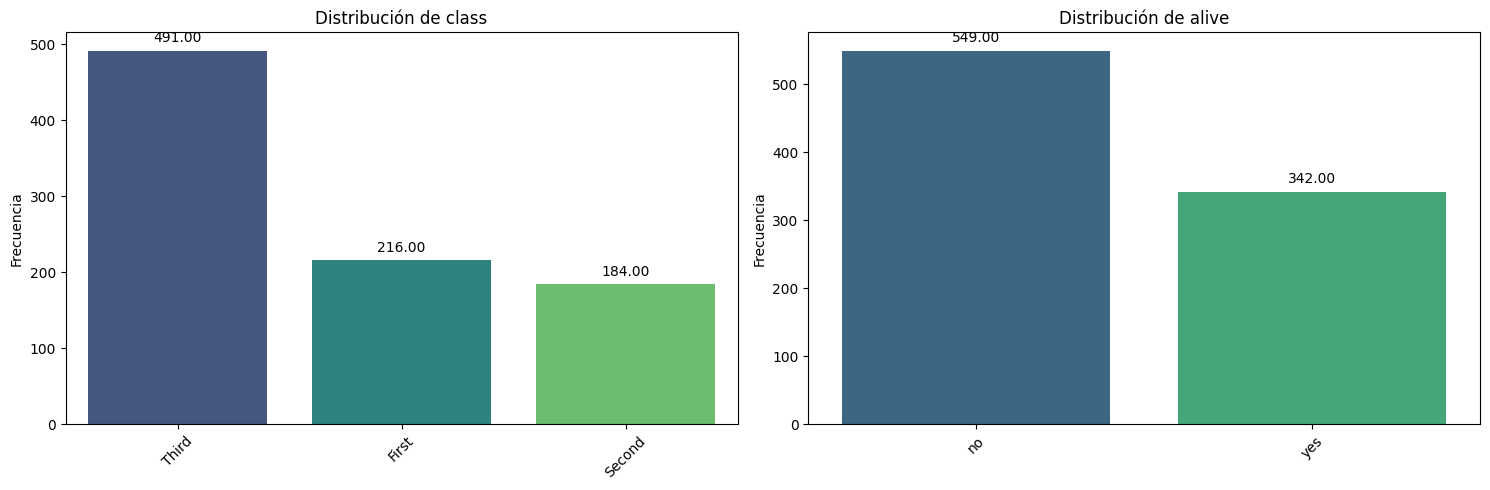

In [70]:
# ABOSLUTA
pinta_distribucion_categoricas(df_titanic, ['class', 'alive'], mostrar_valores=True)

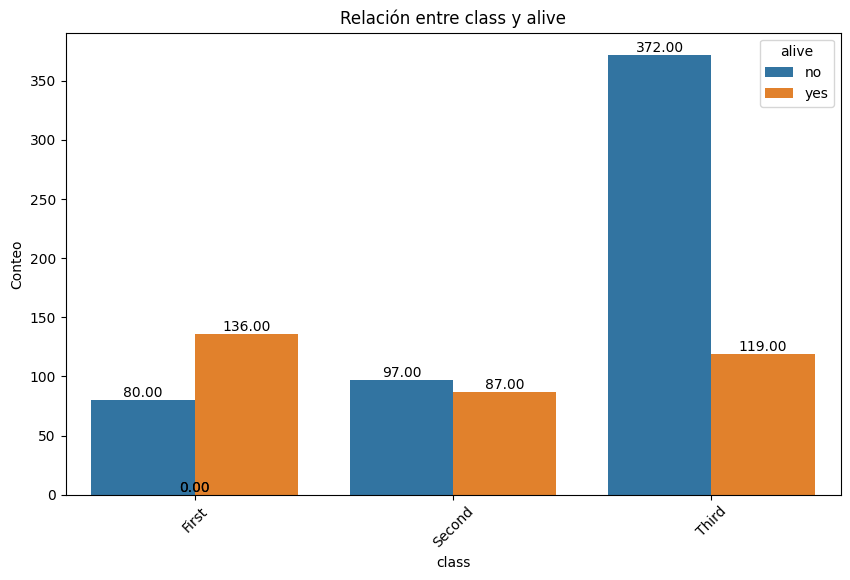

In [73]:
#Comparacion
plot_categorical_relationship_fin(df_titanic,'class', 'alive', show_values= True)

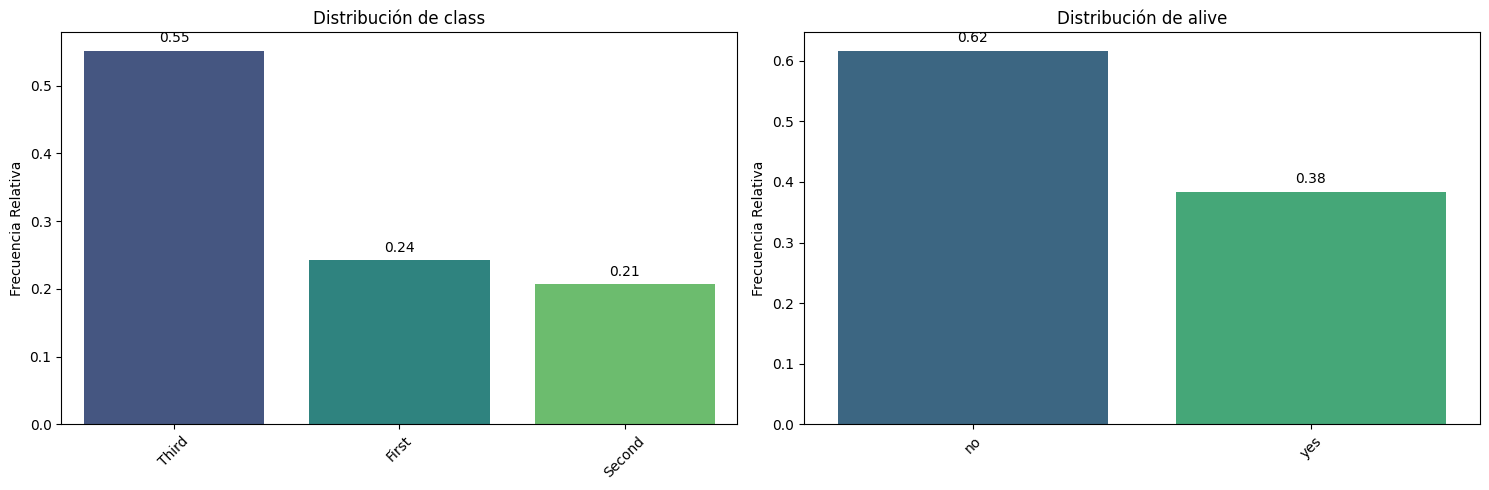

In [74]:
#RELATIVA
pinta_distribucion_categoricas(df_titanic, ['class', 'alive'], relativa = True, mostrar_valores=True)

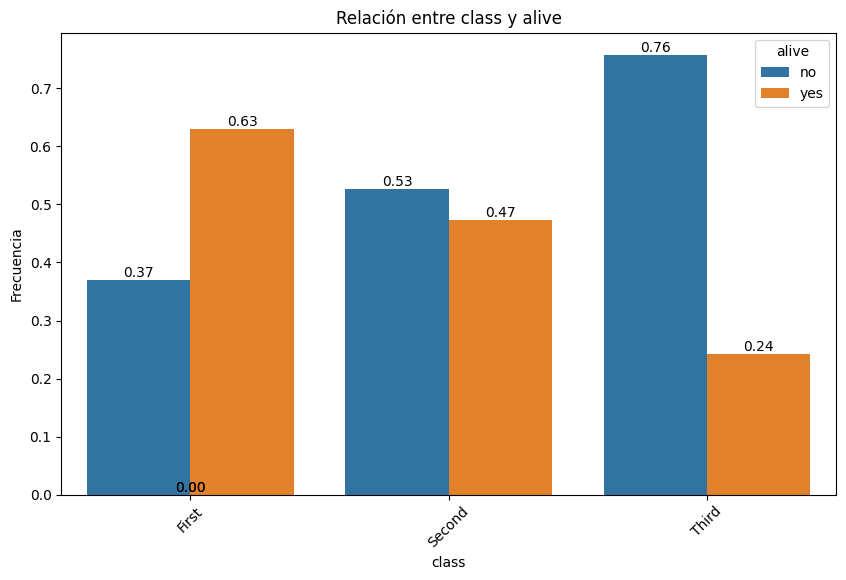

In [75]:
#Comparación
plot_categorical_relationship_fin(df_titanic,'class', 'alive', relative_freq = True, show_values= True)

In [78]:
#TEST DE CHI-CUADRADO
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
tabla_contingencia

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [81]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


### ANALISIS 2
+ Absoluta\
  Podemos ver que los mayores sobrevivientes son de la primera clase y luego parece ser de la tercera clase, pero creo que da a engaño porque también son la mayor cantidad de pasajeros.
+ Relativa\
  Ahora si que con diferencia los de primera clase son los mayores supervivientes seguidos de la segunda clase y como final los de tercera clase. Parece ser que tiene relación según la tu clase tenias como un seguro de vida.
+ Test Chi-Cuadrado\
  Viendo el resultado del test, la creencia anterior se vuelve cierta, existe una relación entre poder sobrevivir y la clase que eras, contra tu clase fuera mas alta, tu seguro de sobrevivir era mas alto.
  

**3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?**

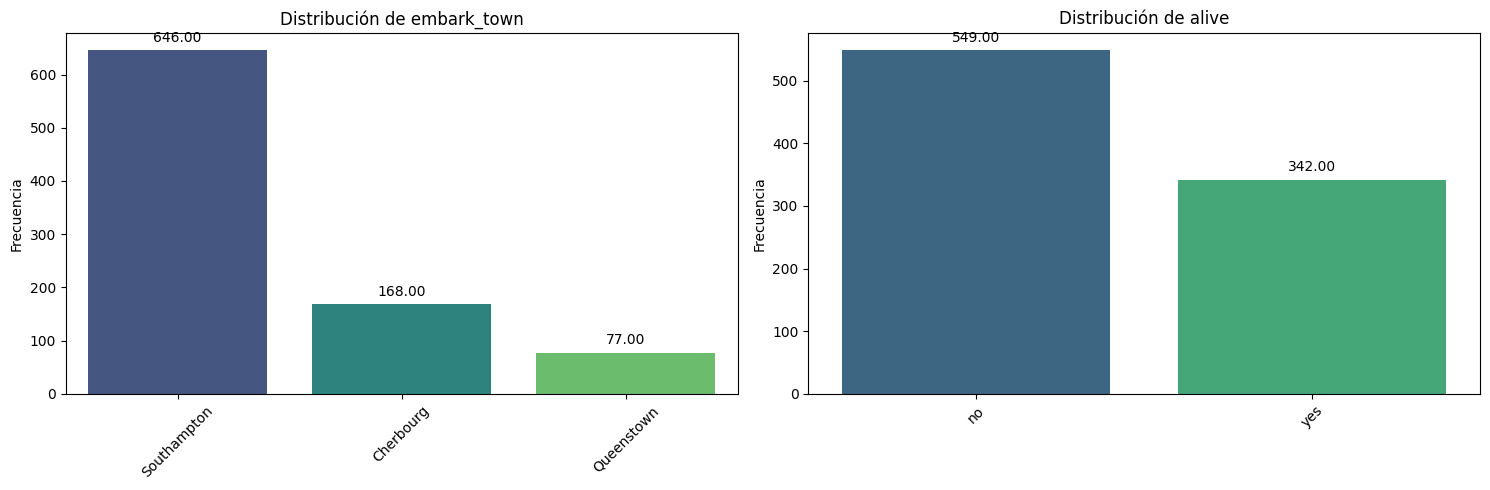

In [85]:
#ABSOLUTA
pinta_distribucion_categoricas(df_titanic, ['embark_town', 'alive'], mostrar_valores=True)

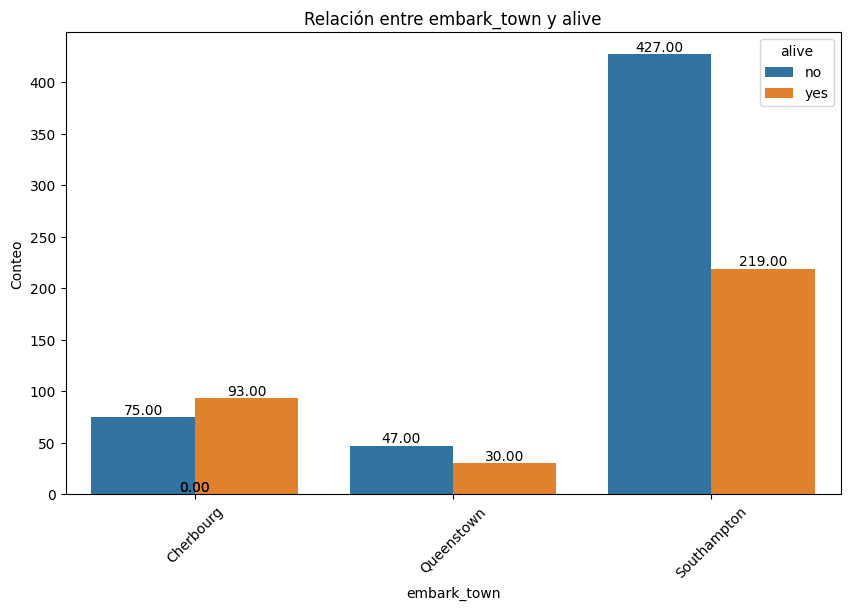

In [86]:
#Comparación
plot_categorical_relationship_fin(df_titanic,'embark_town', 'alive', show_values= True)

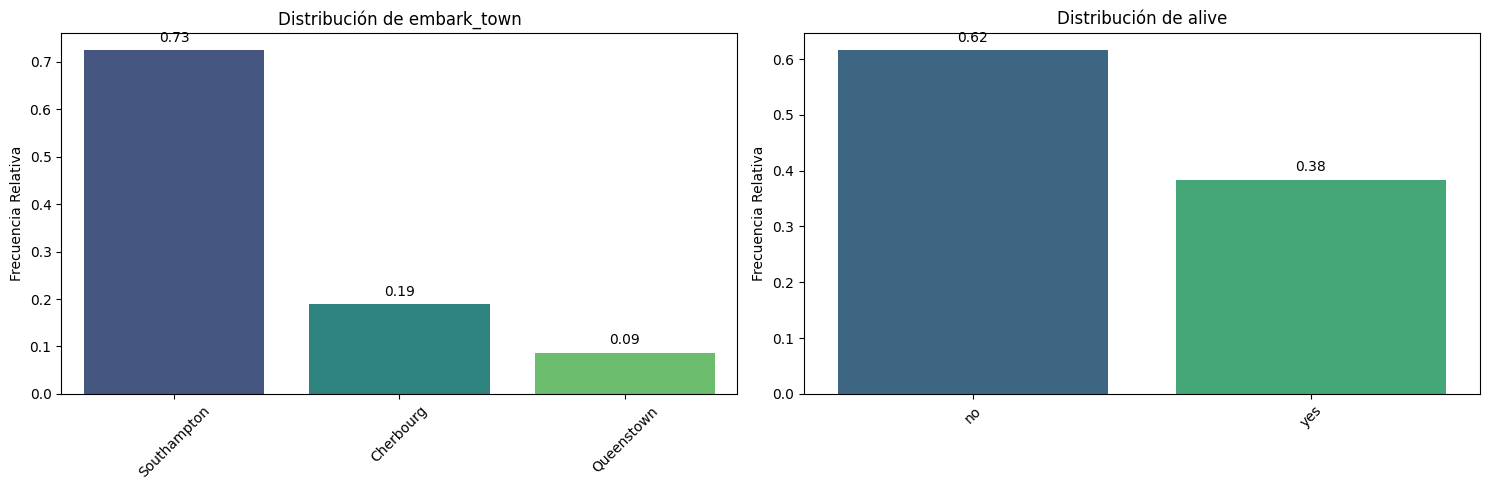

In [83]:
#RELATIVA
pinta_distribucion_categoricas(df_titanic, ['embark_town', 'alive'], relativa = True, mostrar_valores=True)

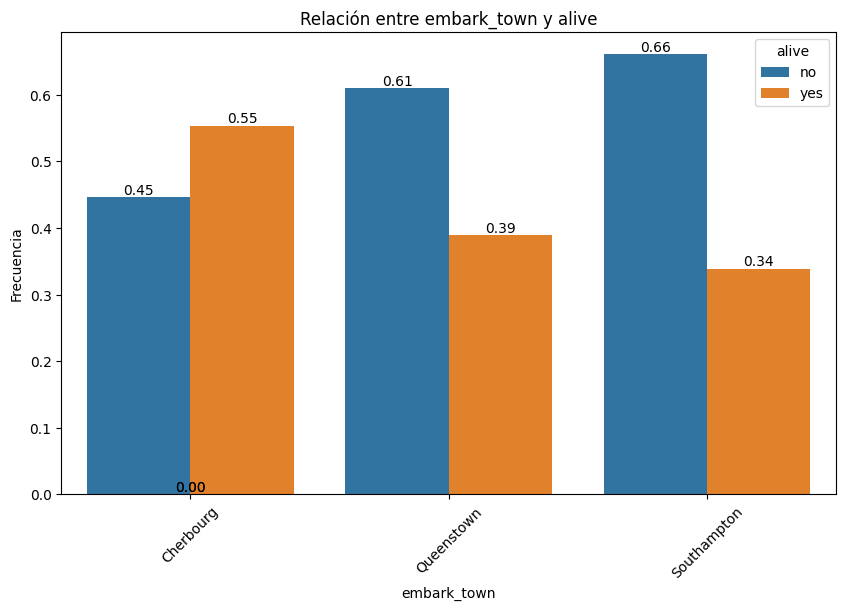

In [93]:
#Comparación
plot_categorical_relationship_fin(df_titanic,'embark_town', 'alive', relative_freq = True, show_values= True)

In [89]:
#TEST DE CHI-CUADRADO
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])
tabla_contingencia

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


In [90]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


### ANALISIS 3
+ Absoluta\
  Como vemos la ciudad dónde hubieron mas sobrevivientes fue 'Southampton' pero también había muchísima gente, seguida de 'Cherbourg' y por último 'Queenstown'. Aunque si nos fijamos puede ser que este dato sea erróneo, lo confirmamos con los datos relativos.
+ Relativa\
  Como era de esperar observando el grafico de la absoluta, 'Cherbourg' fue la que tuvo mas sobrevivientes según los datos relativos, seguida de 'Queenstown' y finalmente 'Southampton'
+ Test Chi-Cuadrado\
  Observando el test, nos damos cuenta que si hay relación entre la ciudad y los sobrevivientes y/o fallecidos

**4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?**

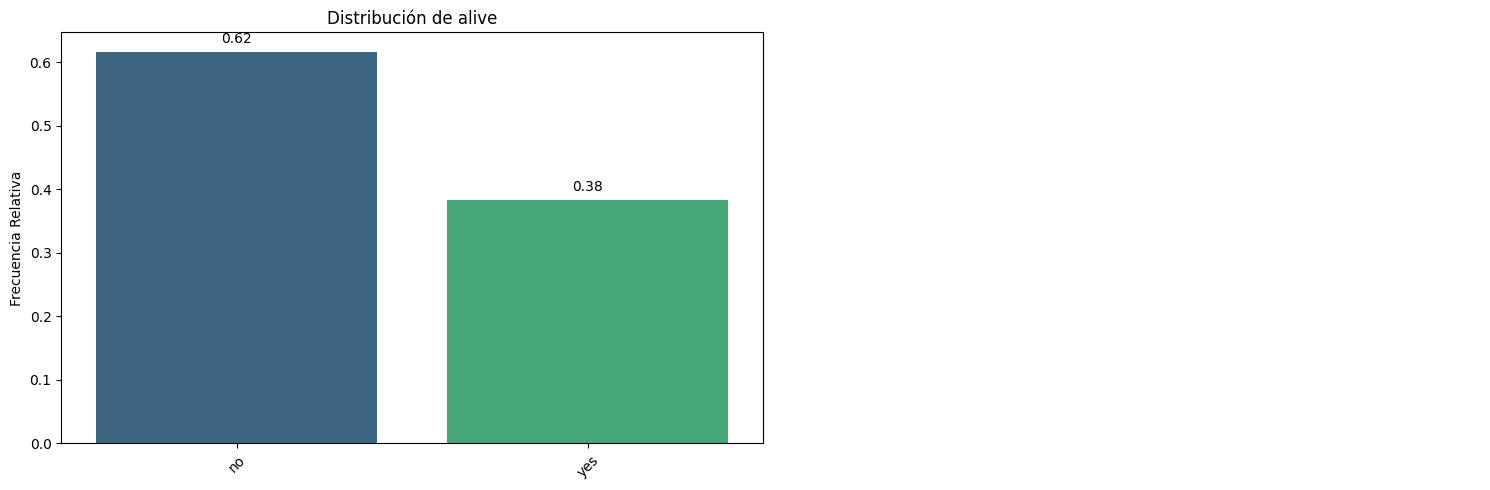

In [110]:
#Distribución de valores
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

(2,)


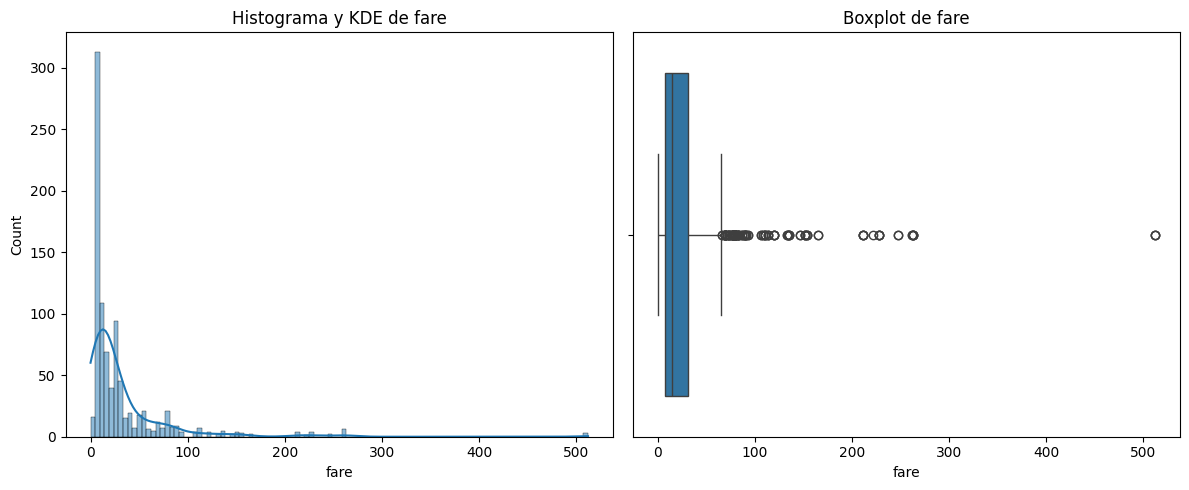

In [125]:
plot_combined_graphs(df_titanic,["fare"])

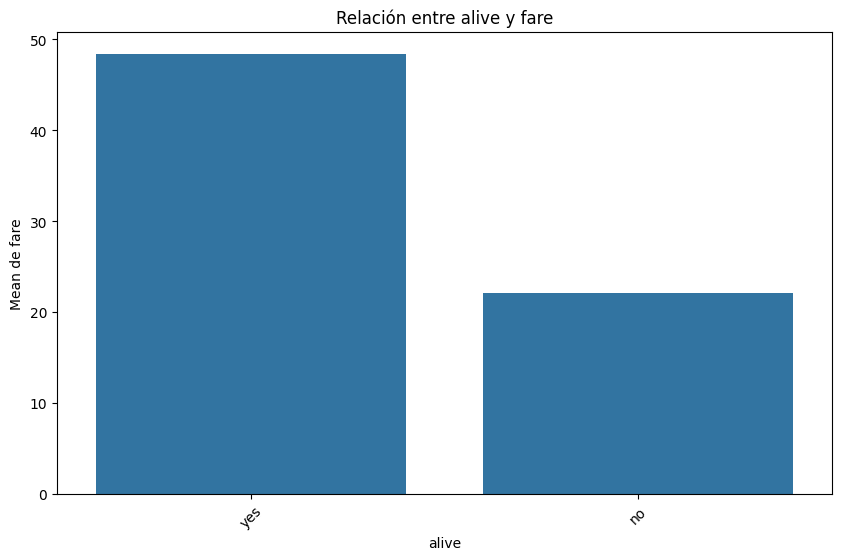

In [113]:
#Mostramos la media del 'fare' y los sobrevivientes o no
plot_categorical_numerical_relationship(df_titanic, 'alive', 'fare', measure = 'mean')

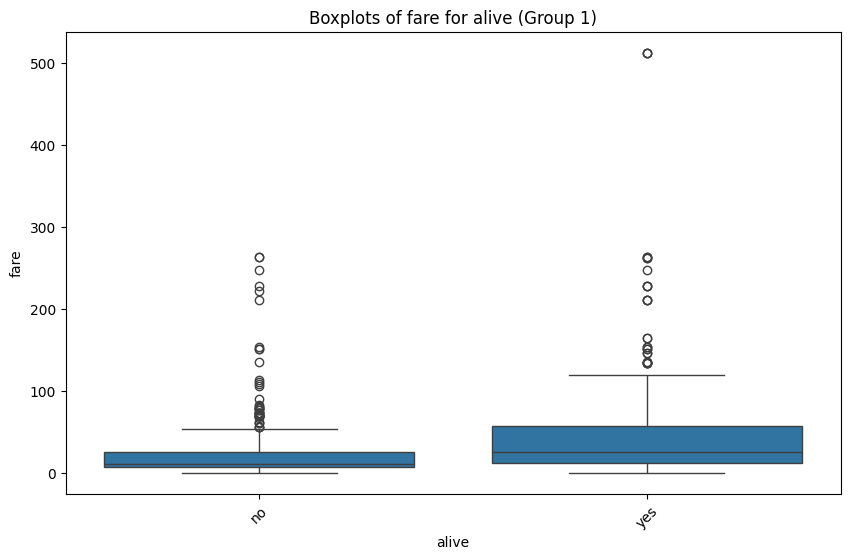

In [114]:
#Vamos a comparar los dos diagrmas de caja, de 'alive' y 'fare'
plot_grouped_boxplots(df_titanic, 'alive', 'fare')

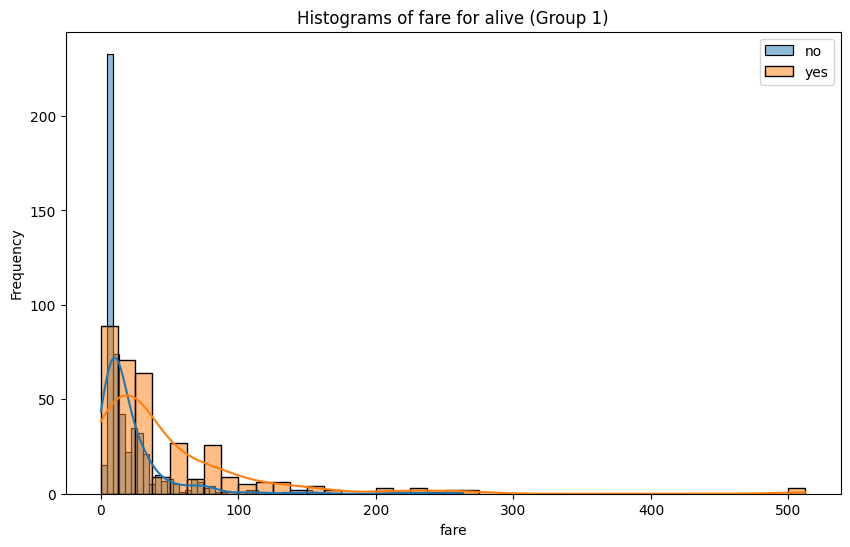

In [117]:
#También vamos a comparar los datos en un hist
plot_grouped_histograms(df_titanic, 'alive', 'fare', 2)

In [122]:
#Como ahora tenemos dos grupos y usaremos el mann-whitmey usando el alive
from scipy.stats import mannwhitneyu 
#separamos según la variable categórica (binaria)
si = df_titanic.loc[df_titanic.alive == 'yes']['fare']
no = df_titanic.loc[df_titanic.alive == 'no']['fare']

In [123]:
u_stat, p_valor = mannwhitneyu(si, no)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


### ANALISIS 4
+ Se puede ver es que sobrevivientes están mas en primera/segunda clase, hay unos cuantos de tercera clase, parece que son mas que el resto, pero da a engaño porque los clientes de tercera eran mayoría. (hablando de las clases se entiende que pagaron mas o menos)
+ Test mann-whitmey\
  Pero con el test nos cercioramos que hay una notable relación entre los sobrevivientes y el precio de billete, contra mas caro mejor clase obtenían y preferencia de salvamento a la hora del hundimiento

**5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?**

In [160]:
df_gratis = df_titanic[df_titanic.fare == 0]
print(f'Hay {len(df_gratis)} pasajeros que no pagaron billete')
print(df_gratis.age.median())
df_gratis

Hay 15 pasajeros que no pagaron billete
28.0


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0
263,male,40.0,0.0,First,man,True,Southampton,no,True,0
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0
277,male,28.0,0.0,Second,man,True,Southampton,no,True,0
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0
413,male,28.0,0.0,Second,man,True,Southampton,no,True,0
466,male,28.0,0.0,Second,man,True,Southampton,no,True,0
481,male,28.0,0.0,Second,man,True,Southampton,no,True,0
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0
633,male,28.0,0.0,First,man,True,Southampton,no,True,0


In [161]:
#Se ve bien pero vamos ver que clase, who, embark_twon, alive, alone
lista = ['class', 'who', 'embark_town', 'alive', 'alone']
for x in lista:
    absoluto = df_gratis[x].value_counts()
    print(absoluto)
    print('---------------------')
    print('\n'*2)

class
Second    6
First     5
Third     4
Name: count, dtype: int64
---------------------



who
man    15
Name: count, dtype: int64
---------------------



embark_town
Southampton    15
Name: count, dtype: int64
---------------------



alive
no     14
yes     1
Name: count, dtype: int64
---------------------



alone
True    15
Name: count, dtype: int64
---------------------





In [158]:
max_fare = df_titanic.fare.max()
df_titanic.loc[df_titanic['fare'] == max_fare]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


### ANALISIS 5
+ Si, hay 15 pasajeros que no pagaron billete, tenían una media de 28 años de edad, 6 de ellos pertenecían a segunda clase, 5 a primera y 4 a tercera, de los cuales todos eran hombres, iban solos y embarcaron en Southampton. De esos 15 pasajeros sobrevivió 1 que de echo iba en tercera clase.
+ La persona que mas dinero se dejó, son 3 pasajeros, de 35 años de media, de los cuales eran dos hombres y una mujer, todos 3 en primera clase y todos sobrevivieron.

**6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.**

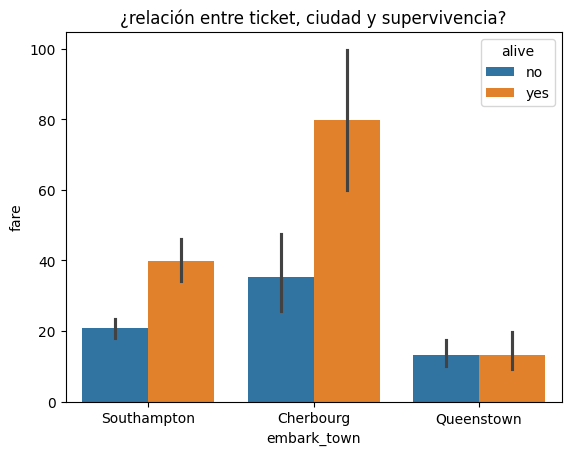

In [185]:
sns.barplot(data = df_titanic, x = 'embark_town', y = 'fare', hue = 'alive')
plt.title('¿relación entre ticket, ciudad y supervivencia?')
plt.show()

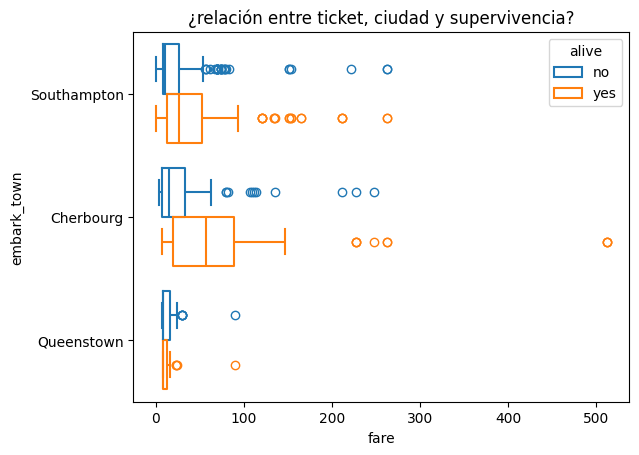

In [188]:
sns.boxplot(data = df_titanic, x = 'fare', y = 'embark_town', hue = 'alive', fill = False)
plt.title('¿relación entre ticket, ciudad y supervivencia?')
plt.show()

### ANALISIS 6
+ Se ve una relación según la gente de Cherbourg que son unos que pagaron bastante por los tickets, también está la ciudad Southampton que hay también bastantes sobrevivientes y también pagaron bastante por los tickets.
+ Podemos ver una relación en que los que mas pagaron (no todos) son los que se salvaron en comparación con Queenstown, seguramente al ver el precio de los tickets son los que iban en tercera clase.

**7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?**

**8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?**

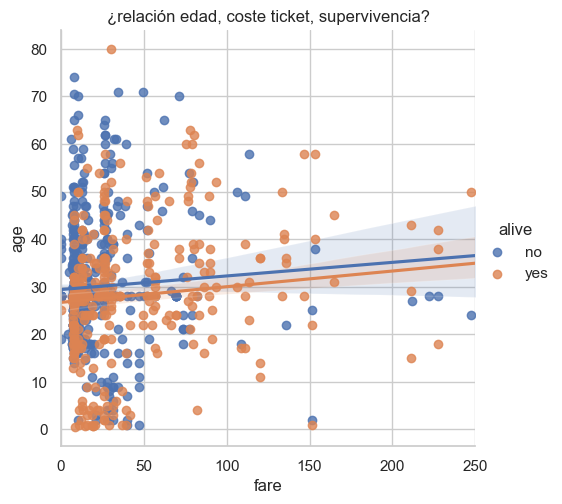

In [230]:
sns.lmplot(data=df_titanic, x = 'fare', y='age', hue='alive')
plt.title('¿relación edad, coste ticket, supervivencia?')
plt.xlim(0,250) #Sacrificamos algún dato extremo pero así vemos mas claro el resto de datos
plt.show()

### ANALISIS 6
+ Vemos una relación que indica que contra mas pagues por el ticket, mas vas a sobrevivir, y como se ve la mayoría de niños por poco que pagasen fueron salvados, en el primer rango de precio, los que mas se salvaron fueron hasta los 30 que es la edad media, puede ser que fueran madres la mayoría con los hijos, luego los que tenían edad 35 años en adelante se ve que fallecieron muchísimos, concuerda que pagaron el menor precio del ticket, si vemos la dispersión que hay del ticket 50 libras en adelante, la mayoría fueron salvados.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [240]:
df_vuelos = pd.read_csv('./data/dataset_viajes_jun.csv')

In [246]:
#pd.set_option('display.max_rows', 148)  # Lo activamos para ver todo

df_vuelos.groupby('aircompany')[['origen', 'destino']].value_counts()

aircompany  origen      destino    
Airnar      Cincinnati  Los Angeles    7
            Bali        Cincinnati     6
            Cincinnati  París          6
            Ginebra     Cincinnati     6
                        Los Angeles    6
                                      ..
TabarAir    Cincinnati  Londres        2
            Nueva York  Cincinnati     2
            Roma        Ginebra        2
            Londres     Cincinnati     1
                        Los Angeles    1
Name: count, Length: 148, dtype: int64

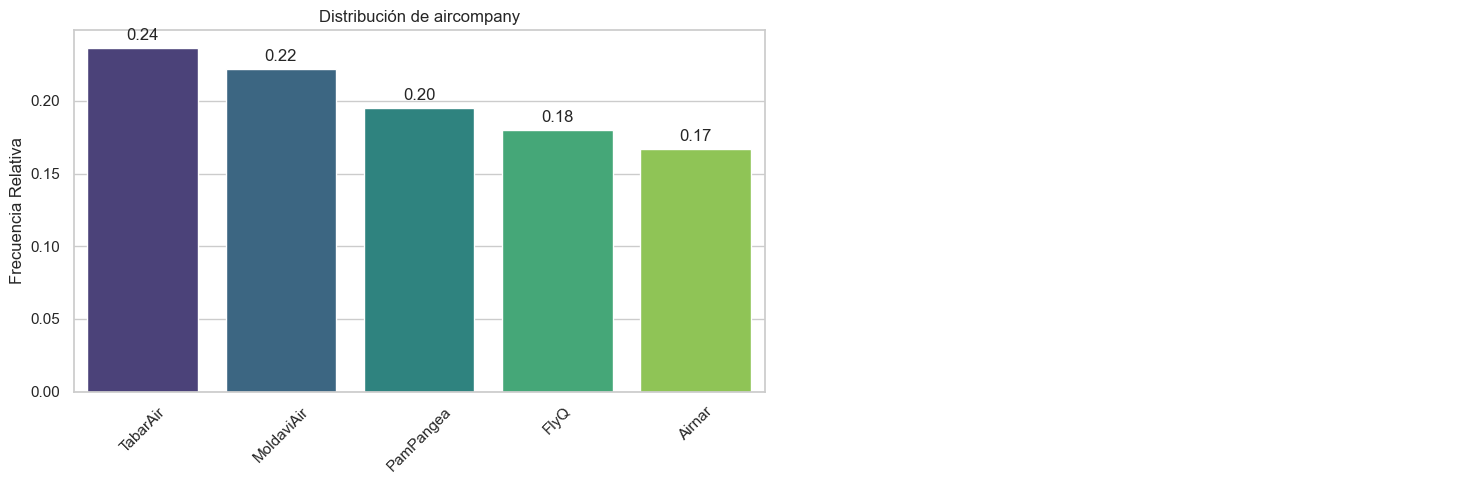

In [252]:
pinta_distribucion_categoricas(df_vuelos, ['aircompany'], relativa= True, mostrar_valores= True)

(2,)


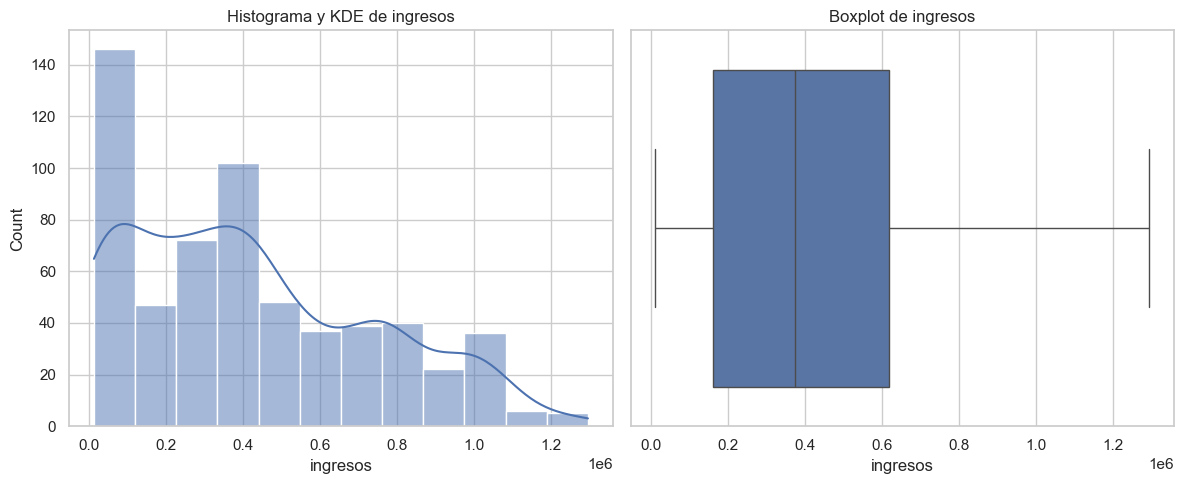

In [251]:
plot_combined_graphs(df_vuelos, ['ingresos'])

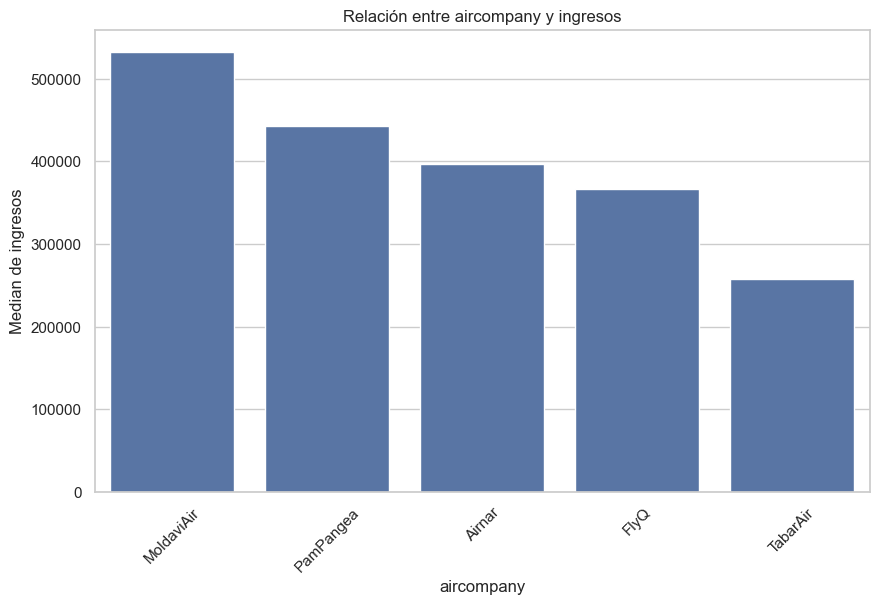

In [254]:
plot_categorical_numerical_relationship(df_vuelos, 'aircompany','ingresos',measure='median')

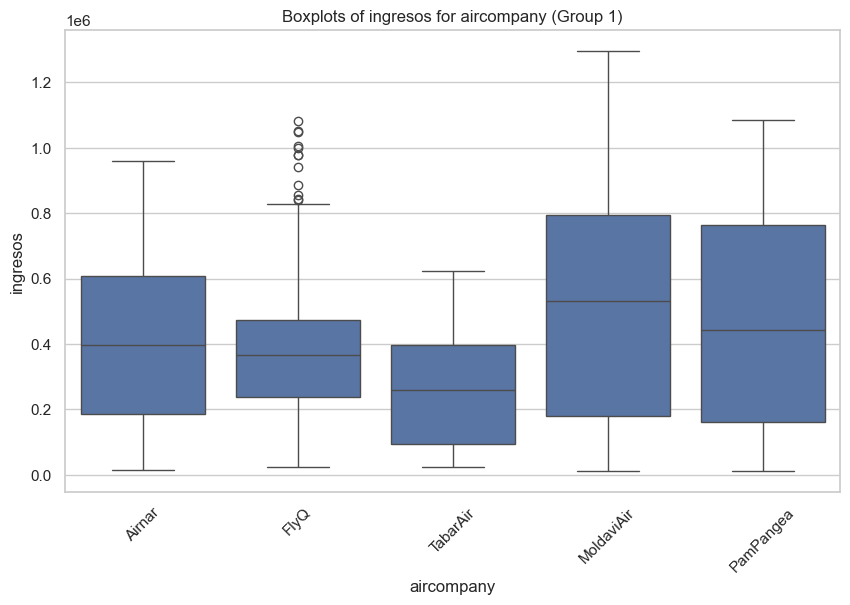

In [256]:
plot_grouped_boxplots(df_vuelos,"aircompany","ingresos")

### ANALISIS 
+ Nosotros en comparación con la competencia, tenemos unos ingresos regulares, ya que ofrecemos vuelos iguales y muchos, por ejemplo un día normal en la ruta barcelona-madrid, suelen haber 5 idas a Madrid y 5 vuelas a Barcelona entre otras rutas que van a otras ciudades y paises, y cobramos poco por ticket en comparacion con MoldaviAir que ofrece lujos y otras comodidades a los clientes, y no ofrecen vuelos tan marcados como los nuestros.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


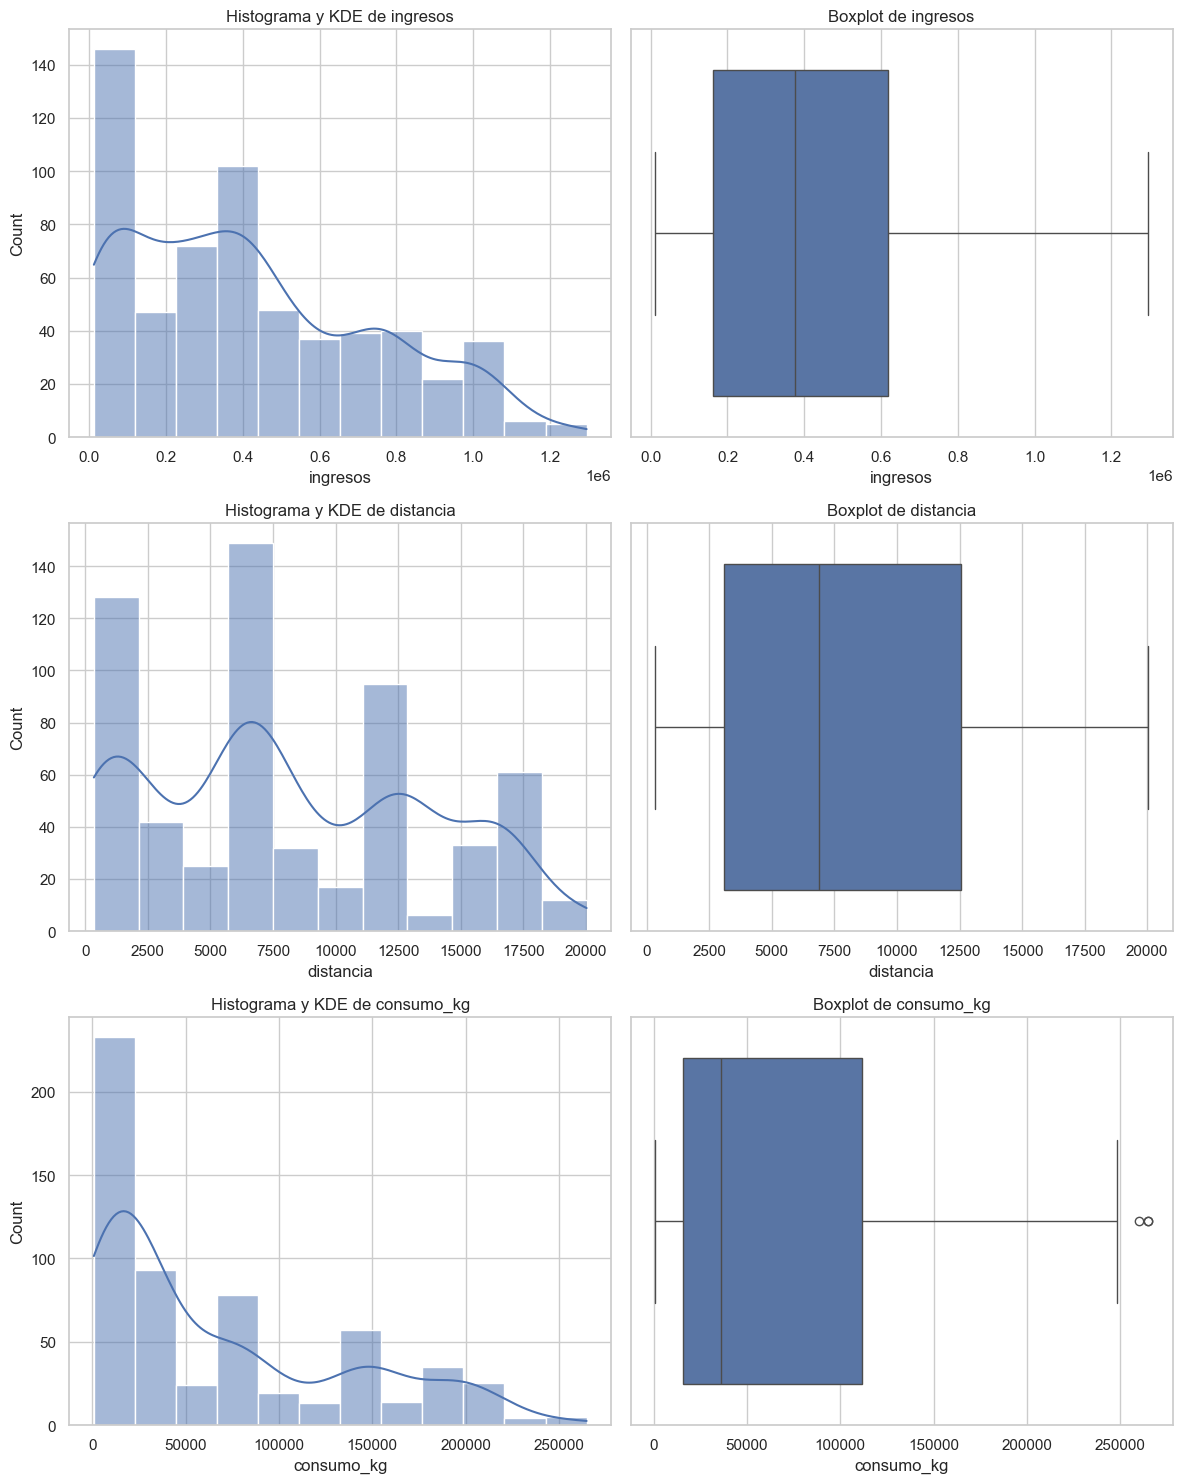

In [259]:
plot_combined_graphs(df_vuelos, ['ingresos','distancia', 'consumo_kg'])

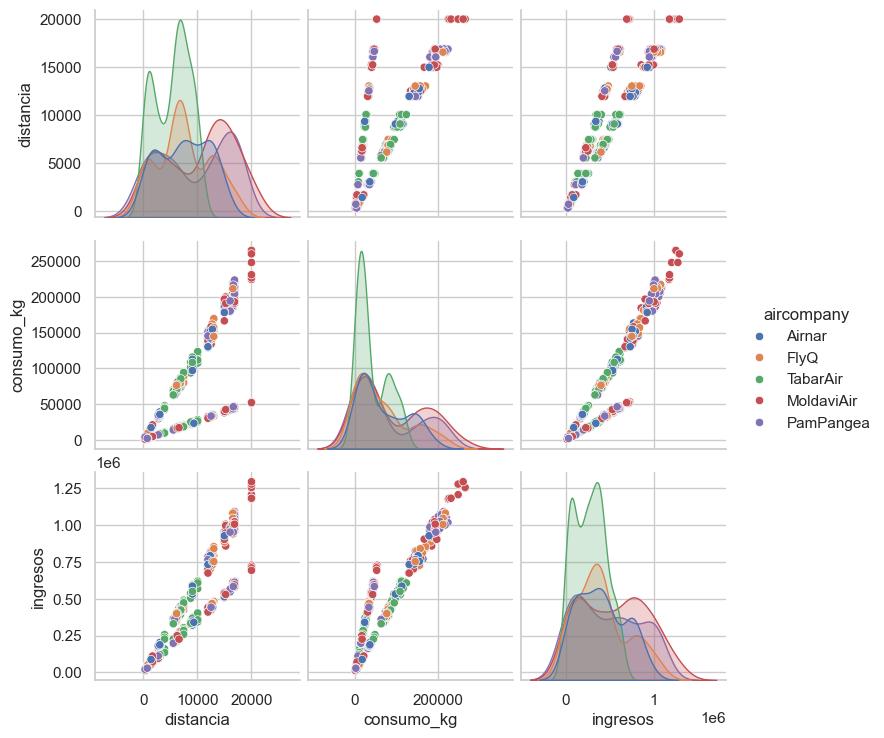

In [272]:
#visualización de los diagramas de dispersión
columnas = df_vuelos[['distancia', 'consumo_kg', 'ingresos', 'aircompany']]
sns.pairplot(columnas, hue='aircompany')
plt.show()

### ANALISIS 
+ Como vemos todas apuntan arriba a la derecha, y son completas, eso nos indica que hay una correlación fuerte
+ Por ejemplo en consumo, vemos dos líneas, imagino que la mas corta serán vuelos de corto radio, y la mas larga pertenecen a vuelos de largo radio, tiene sentido que a mayor distancia mayor consumo, y a mayor distancia se usa un avión mas grande, lo que significa que va a gastar mas combustible a la hora del despegue en comparación con un aeronave de corto radio.
+ Como es de imaginar a mayor distancia mayor ingresos, ya que un vuelo de larga distancia cuesta mas que uno de corta distancia, por el coste que tiene que el aeronave este operando 8 o mas horas.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [277]:
df_vuelos.describe().distancia

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [278]:
bins = [0, 3000, 7000, df_vuelos.distancia.max()]
df_vuelos['cat_vuelo'] = pd.cut(df_vuelos.distancia, bins, labels = ['corto', 'medio', 'largo'])

In [280]:
df_vuelos.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,corto
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,largo
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,largo
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,medio
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,largo


(2, 2)


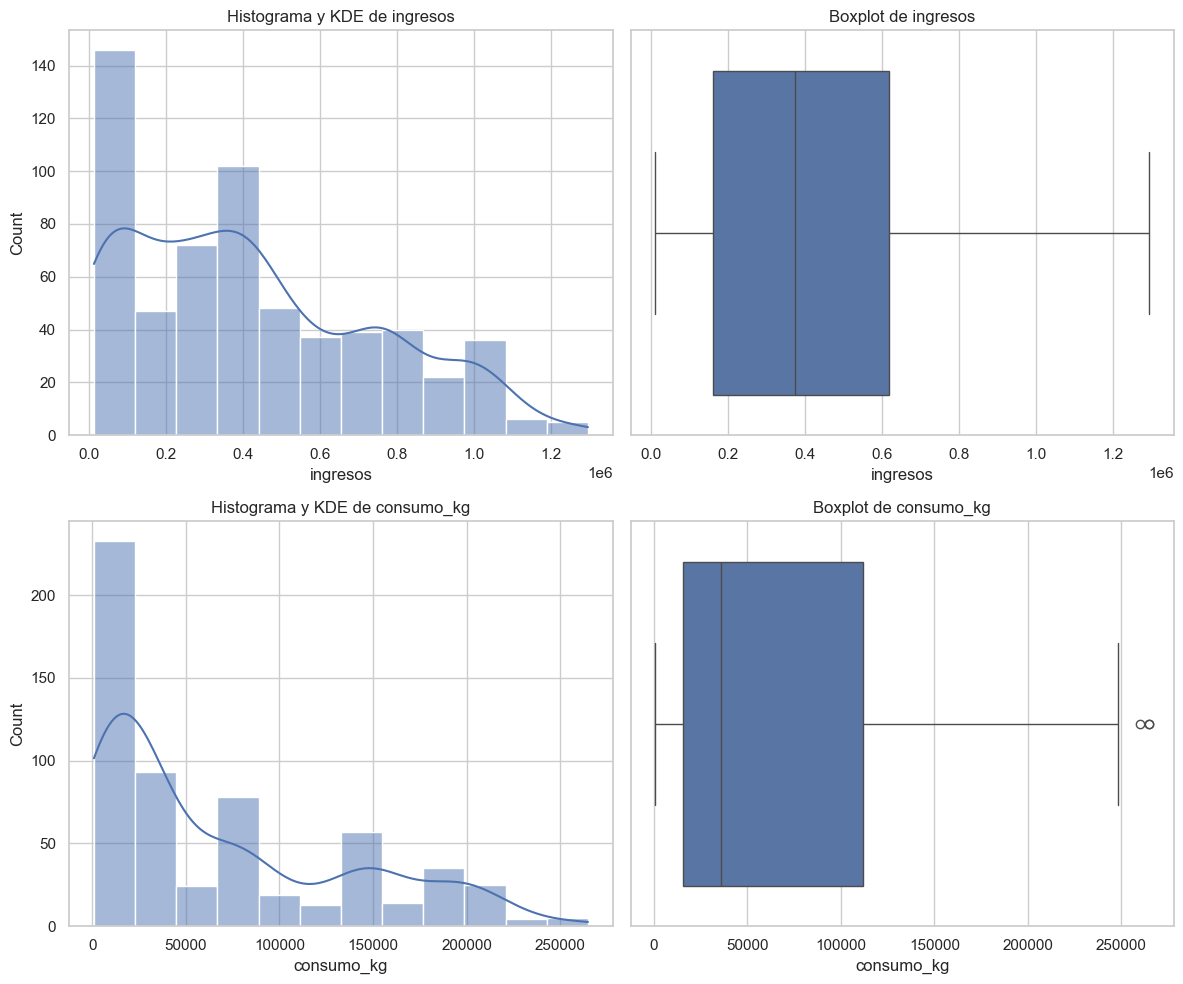

In [282]:
plot_combined_graphs(df_vuelos, ['ingresos', 'consumo_kg'])

In [287]:
directora  = 'cat_vuelo'
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario = {}
for x in df_vuelos[directora].unique():
    diccionario[x] = df_vuelos.loc[df_vuelos[directora] == x,[col_2, col_1]]

Vuelo corto:


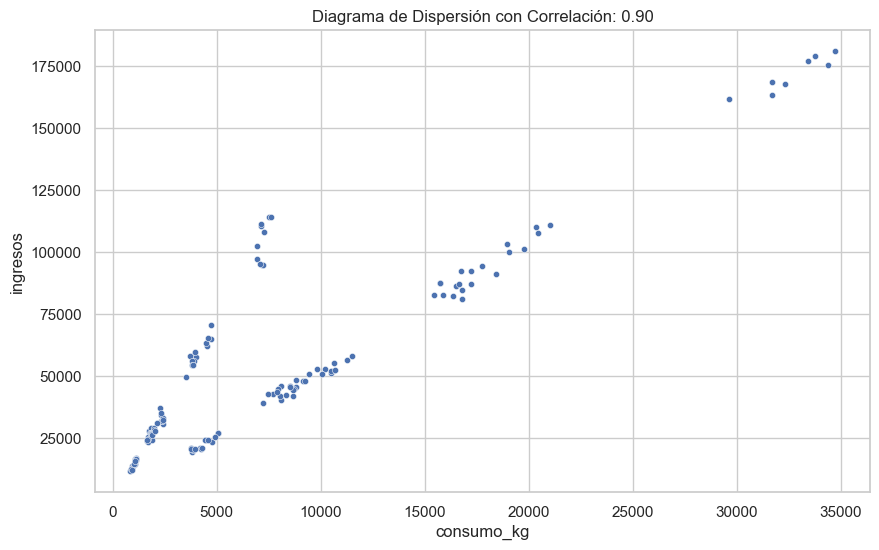

Vuelo largo:


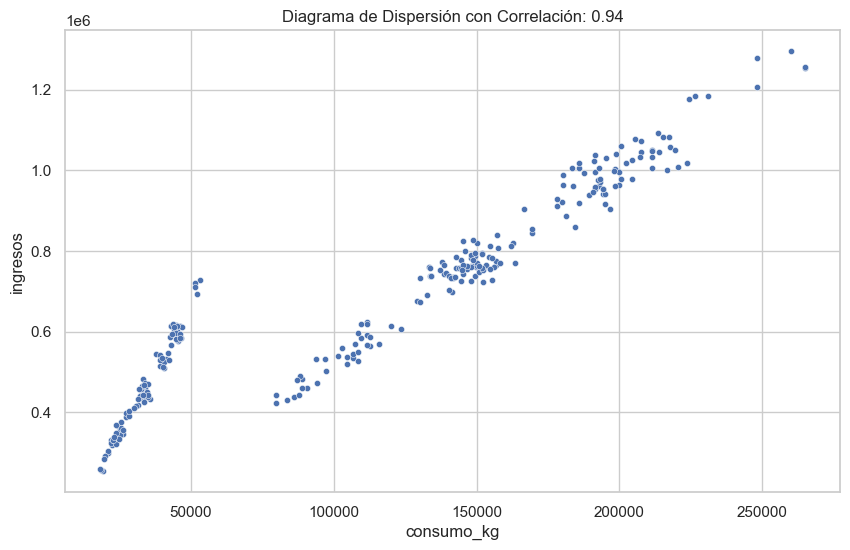

Vuelo medio:


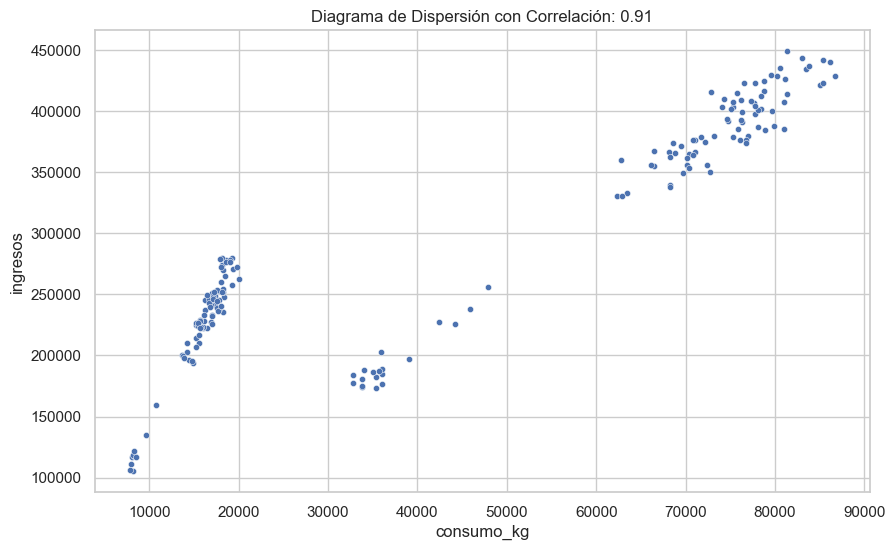

In [290]:
#Bivariante para todo
for valor, datos in diccionario.items():
    print(f"Vuelo {valor}:")
    grafico_dispersion_con_correlacion(datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

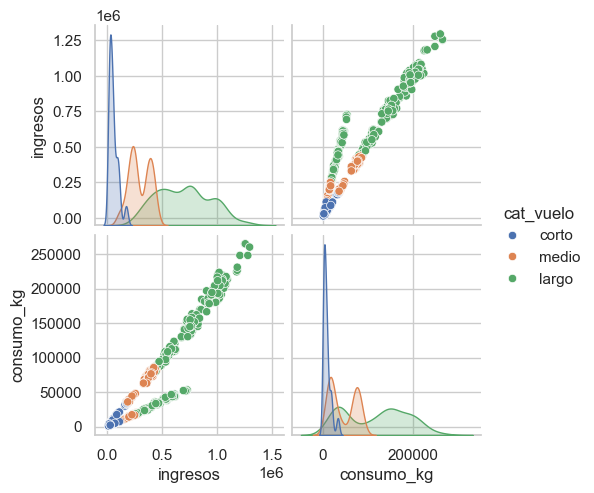

In [292]:
#visualización de los diagramas de dispersión
#Me gusta mas esto que el anterior
columnas = df_vuelos[['cat_vuelo', 'ingresos', 'consumo_kg']]
sns.pairplot(columnas, hue='cat_vuelo')
plt.show()

### ANALISIS 
+ Vemos como antes, hay una correlación positiva, como observamos los vuelos largos consumen mas y también ingresan mas como es de esperar, y los vuelos cortos y medios lo mismo pero a menor escala como es obvio, teniendo en cuenta que los aviones son mas o menos del mismo año.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.